In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Домашнее задание. 

Во вкладке Files в группе Webinars прикреплен файл _olimpicmedals.csv с данными о медалях на
Олимпийских играх за 1896-2008 годы.
Скачайте .csv файл себе на диск, загрузите данные в DataFrame (функция _readcsv) и ответьте на
следующие вопросы, используя функционал pandas:
1. Сколько медалей выиграл Jesse Owens в 1936?
2. Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне?
3. Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?
4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша.
Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.
5. Как много медалей было выйграно мужчинами и женщинами в истории олимпиады. Как много
золотых, серебрянных и бронзовых медалей было выйграно каждым полом?
6. Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде.
7. Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей
истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней
заработанной медали.
8. Атлеты выйгравшие медали в Beijing на дистанции 100m или 200m
9. Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике.
10. Постройте график 5 атлетов которые выйграли большинство золотых медалей.
11. Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх.
12. Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год)
по общему количеству медалей. Включите дисциплину атлета.

In [2]:
# Load data
data = pd.read_csv('olimpic_medals.csv', header = 0)

In [3]:
data.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


##### 1. Сколько медалей выиграл Jesse Owens в 1936?

In [5]:
# Jesse Owens medals
jo_medals = len(data[(data.Athlete == 'OWENS, Jesse') & (data.Edition == 1936)])

In [6]:
print(f'Jesse Owens took {jo_medals} medals in 1936 year')

Jesse Owens took 4 medals in 1936 year


##### 2. Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне?

In [7]:
# Gold medals in badminton
badminton = data[(data.Discipline == 'Badminton') & (data.Medal == 'Gold')]['NOC'].value_counts().index[0]

In [8]:
print(f'{badminton} has won the bigest number of medals in badminton.')

CHN has won the bigest number of medals in badminton.


##### 3. Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [9]:
# Countries with bigest number of medals from 1984 till 2008
countries = [i for i in data[(data.Edition >= 1984) & (data.Edition <= 2008)]['NOC'].value_counts().index[0:3]]

In [10]:
print(*countries, sep = ', ', end = ' ')
print('have won bigest quantity of medals.')

USA, AUS, GER have won bigest quantity of medals.


##### 4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша.
Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [11]:
# Gold medal men for 100m.
gold_100m = data[['Athlete', 'NOC', 'City', 'Edition']][(data.Event == '100m') & (data.Gender == 'Men') & 
                                                       (data.Medal == 'Gold')]
gold_100m.sort_values(by = 'Edition', ascending=False, inplace=True)

In [12]:
print(f'Men who won gold medals in 100m:\n {gold_100m}')

Men who won gold medals in 100m:
                      Athlete  NOC                   City  Edition
27552            BOLT, Usain  JAM                Beijing     2008
25539         GATLIN, Justin  USA                 Athens     2004
23521        GREENE, Maurice  USA                 Sydney     2000
21598        BAILEY, Donovan  CAN                Atlanta     1996
19859      CHRISTIE, Linford  GBR              Barcelona     1992
18284            LEWIS, Carl  USA                  Seoul     1988
16794            LEWIS, Carl  USA            Los Angeles     1984
15374           WELLS, Allan  GBR                 Moscow     1980
14069       CRAWFORD, Hasely  TRI               Montreal     1976
12902         BORZOV, Valery  URS                 Munich     1972
11865       HINES, James Ray  USA                 Mexico     1968
10823          HAYES, Robert  USA                  Tokyo     1964
9924             HARY, Armin  EUA                   Rome     1960
9009   MORROW, Robert Joseph  USA  Melbour

##### 5. Как много медалей было выйграно мужчинами и женщинами в истории олимпиады. Как много золотых, серебрянных и бронзовых медалей было выйграно каждым полом?

In [13]:
# How many medals did men and women win?
men_medals = data[data.Gender == 'Men']['Medal'].count()
wom_medals = data[data.Gender == 'Women']['Medal'].count()

In [14]:
print(f'Men won {men_medals} medals, women won {wom_medals} medals.')

Men won 21721 medals, women won 7495 medals.


In [15]:
# Medals types for genders
df_gen_medal = pd.crosstab(data.Gender, data.Medal)

In [16]:
print(f'Medals per gender: \n\n{df_gen_medal}')

Medals per gender: 

Medal   Bronze  Gold  Silver
Gender                      
Men       7175  7365    7181
Women     2514  2485    2496


##### 6. Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде.

In [17]:
# Medals curves
gr_data = data.groupby('Edition')

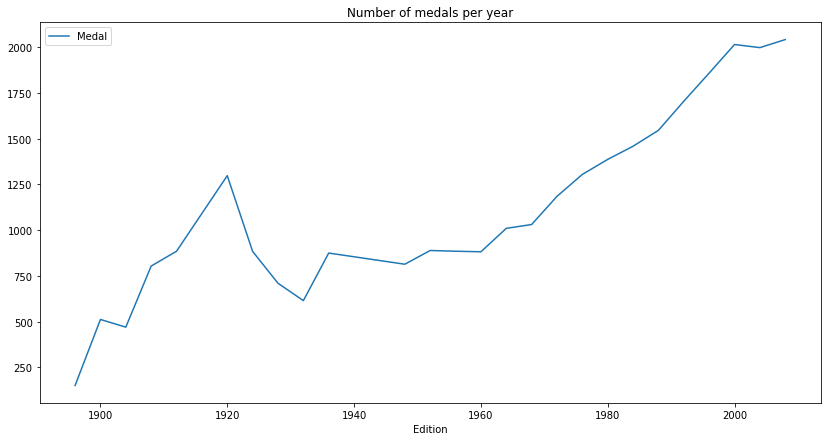

In [18]:
gr_data.Medal.count().plot(figsize=(14, 7), title = 'Number of medals per year',
                          legend = True)
plt.show()

##### 7. Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [19]:
# Medals by countries
country_medals = data.groupby('NOC')

In [20]:
# Create list of countries with data about medals
medals_by_contry = pd.DataFrame({'NOC': [c for c, gr in country_medals], 
                      'Medals_quantity': [gr.Medal.count() for c, gr in country_medals], 
                     'First_medal_year': [sorted(list(gr.Edition))[0] for c, gr in country_medals],
                     'Last_medal_year': [sorted(list(gr.Edition))[-1] for c, gr in country_medals]})

In [21]:
medals_by_contry

,NOC,Medals_quantity,First_medal_year,Last_medal_year
0,AFG,1,2008,2008
1,AHO,1,1988,1988
2,ALG,14,1984,2008
3,ANZ,29,1908,1912
4,ARG,239,1924,2008
...,...,...,...,...
133,VIE,2,2000,2008
134,YUG,435,1924,2000
135,ZAM,2,1984,1996
136,ZIM,23,1980,2008


##### 8. Атлеты выйгравшие медали в Beijing на дистанции 100m или 200m

In [22]:
# Athletes who won medals in Beijing in 100m or 200m
at_100_200 = data[['Athlete', 'NOC', 'Medal', 'Event']][(data.City == 'Beijing') & 
                                                        ((data.Event == '100m') | (data.Event == '200m'))]

In [23]:
print(f'Athletes who won medals in Beijing in 100m or 200m:\n\n{at_100_200}')

Athletes who won medals in Beijing in 100m or 200m:

                        Athlete  NOC   Medal Event
27551               DIX, Walter  USA  Bronze  100m
27552               BOLT, Usain  JAM    Gold  100m
27553         THOMPSON, Richard  TRI  Silver  100m
27554        FRASER, Shelly-ann  JAM    Gold  100m
27555          SIMPSON, Sherone  JAM  Silver  100m
27556           STEWART, Kerron  JAM  Silver  100m
27569               DIX, Walter  USA  Bronze  200m
27570               BOLT, Usain  JAM    Gold  200m
27571           CRAWFORD, Shawn  USA  Silver  200m
27572           STEWART, Kerron  JAM  Bronze  200m
27573  CAMPBELL-BROWN, Veronica  JAM    Gold  200m
27574            FELIX, Allyson  USA  Silver  200m


##### 9. Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике.

In [24]:
# Sportsmen from USA who won gold medals in athletic
usa_gold = data[['Athlete', 'Gender', 'Edition', 'Event']
                   ][(data.NOC == 'USA') & (data.Medal == 'Gold') & (data.Discipline == 'Athletics')]

In [25]:
usa_gold

,Athlete,Gender,Edition,Event
13,"BURKE, Thomas",Men,1896,100m
15,"CURTIS, Thomas",Men,1896,110m hurdles
21,"BURKE, Thomas",Men,1896,400m
27,"GARRETT, Robert",Men,1896,discus throw
29,"CLARK, Ellery",Men,1896,high jump
...,...,...,...,...
27640,"HENDERSON, Monique",Women,2008,4x400m relay
27641,"RICHARDS, Sanya",Women,2008,4x400m relay
27642,"WINEBERG, Mary",Women,2008,4x400m relay
27663,"CLAY, Bryan",Men,2008,decathlon


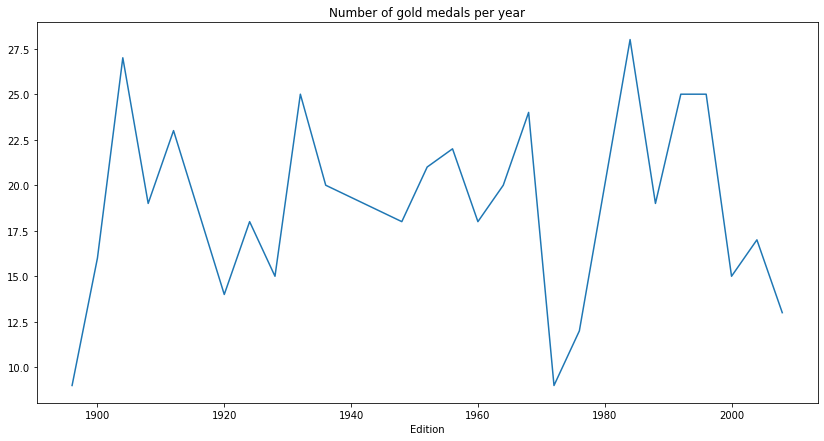

In [26]:
usa_gold.groupby('Edition').Event.count().plot(figsize=(14, 7), title = 'Number of gold medals per year',
                          legend = False)
plt.show()

In [27]:
usa_gold.groupby('Edition').Event.count()

Edition
1896     9
1900    16
1904    27
1908    19
1912    23
1920    14
1924    18
1928    15
1932    25
1936    20
1948    18
1952    21
1956    22
1960    18
1964    20
1968    24
1972     9
1976    12
1984    28
1988    19
1992    25
1996    25
2000    15
2004    17
2008    13
Name: Event, dtype: int64

##### 10. Постройте график 5 атлетов которые выйграли большинство золотых медалей.

In [28]:
# Crosstable athletes and number of gold medals
ath_gold = pd.crosstab(data.Athlete[data.Medal == 'Gold'], data.Medal[data.Medal == 'Gold'])

In [29]:
ath_gold.sort_values(by='Gold', ascending=False, inplace=True)

In [30]:
ath_gold.head(6)

Medal,Gold
Athlete,
"PHELPS, Michael",14
"LATYNINA, Larisa",9
"NURMI, Paavo",9
"LEWIS, Carl",9
"SPITZ, Mark",9
"KATO, Sawao",8


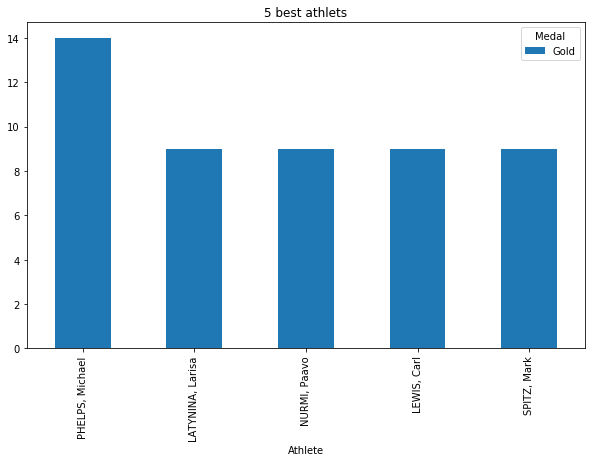

In [31]:
ath_gold[:5].plot.bar(figsize = (10, 6), title = '5 best athlets')
plt.show()

##### 11. Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх.

In [32]:
# Medals in last games by countries
last_games_medals = pd.DataFrame({'Country': [c for c, g in data[data.Edition == 2008].groupby('NOC')], 
                                  'Medals_quantity': [g.Medal.count() for c, g in data[data.Edition == 2008].groupby('NOC')]})

In [33]:
last_games_medals

,Country,Medals_quantity
0,AFG,1
1,ALG,2
2,ARG,51
3,ARM,6
4,AUS,149
...,...,...
81,USA,315
82,UZB,6
83,VEN,1
84,VIE,1


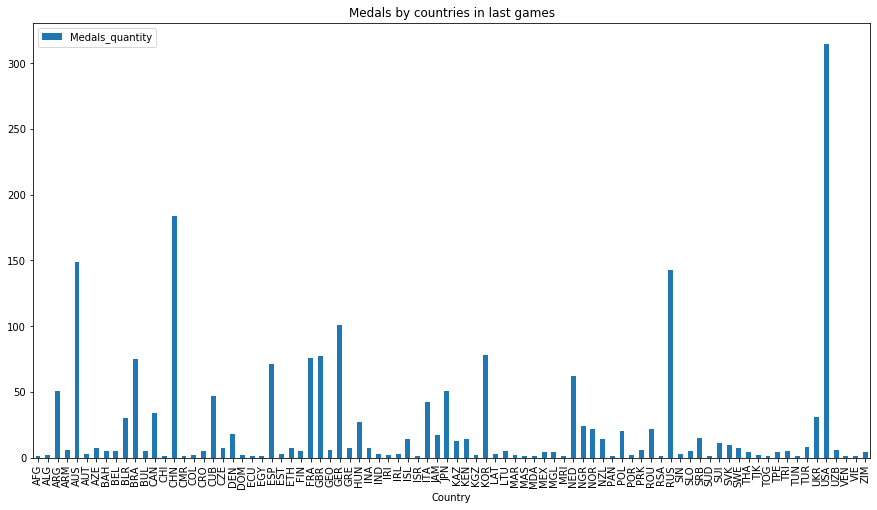

In [34]:
last_games_medals.plot.bar(x = 'Country', y = 'Medals_quantity', figsize = (15, 8), title = 'Medals by countries in last games')
plt.show()

##### 12. Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.

In [35]:
# USA athlets table
usa_athlets = data[data.NOC == 'USA'].groupby('Edition')

# USA athlets' disciplines
usdisc = data[['Athlete', 'Discipline']][data.NOC == 'USA'].copy()
usdisc.drop_duplicates('Athlete', inplace = True)
usdisc.index=usdisc.Athlete

In [36]:
# table with top usa athlets
t_usa_a = pd.DataFrame({'Year': [e for e, g in usa_athlets],
                                'Athlete': [g.Athlete.value_counts().index[0] for e, g in usa_athlets],
                                'Discipline': [usdisc.Discipline[g.Athlete.value_counts().index[0]] 
                                               for e, g in usa_athlets],
                                'Number_of_medals': [g.Athlete.value_counts()[0] for e, g in usa_athlets]})

In [38]:
print(f'Top USA athlets:\n\n {t_usa_a}')

Top USA athlets:

     Year                      Athlete   Discipline  Number_of_medals
0   1896              GARRETT, Robert    Athletics                 4
1   1900    TEWKSBURY, Walter B. John    Athletics                 5
2   1904                EYSER, George  Artistic G.                 6
3   1908             SHEPPARD, Melvin    Athletics                 3
4   1912        OSBURN, Carl Townsend     Shooting                 4
5   1920       SPOONER, Lloyd Spencer     Shooting                 7
6   1924          WEISSMULLER, Johnny     Swimming                 4
7   1928          ROBINSON, Elizabeth    Athletics                 2
8   1932           DIDRIKSON, Mildred    Athletics                 3
9   1936                 OWENS, Jesse    Athletics                 4
10  1948        CURTIS, Ann Elisabeth     Swimming                 3
11  1952          KONNO, Ford Hiroshi     Swimming                 3
12  1956         BREEN, George Thomas     Swimming                 3
13  1960  VON S